In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from collections import Counter
from itertools import combinations

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
all_files = pd.DataFrame()
path = '/content/drive/MyDrive/ML/project-3/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data'
for item in os.listdir(path):
  df = pd.read_csv(os.path.join(path,item))
  all_files = all_files.append(df)

all_files.to_csv('/content/drive/MyDrive/ML/project-3/all_files.csv',index=False)

In [ ]:
all_data= pd.read_csv('/content/drive/MyDrive/ML/project-3/all_files.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


# Section1

### **Data Cleaning and Preprocessing**

first of all lets check all the null values

In [ ]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

there are 545 null rows in each of these column 

In [ ]:
all_data[all_data.isnull().all(axis =1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
75,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN,NaN,NaN
1488,NaN,NaN,NaN,NaN,NaN,NaN
1517,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184390,NaN,NaN,NaN,NaN,NaN,NaN
184779,NaN,NaN,NaN,NaN,NaN,NaN
185239,NaN,NaN,NaN,NaN,NaN,NaN
185614,NaN,NaN,NaN,NaN,NaN,NaN


since in this data all columns are null value data amputation will not be a solution so we will remove all those rows where all columns are null values.

In [ ]:
all_data = all_data.drop(all_data[all_data.isnull().all(axis =1)].index)

In [ ]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

Now since we dont have any null values lets check the datatypes of each column and changed them into their relevent data type acc to ques

In [ ]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

for que 1 we need sales and for that quantity and price should be in integer to calculate sales, so we change there data types from object to integer

In [ ]:
pd.to_numeric(all_data['Quantity Ordered'], errors='raise')

ValueError: ignored

looks like there are some string values in 'quantity ordered' column at position 1483 row lets find them

In [ ]:
all_data[all_data.index == 1483]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


lets check if there are more rows like this if there are , we will remove them

In [ ]:
all_data[all_data['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1483,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1904,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2050,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2225,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3091,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184542,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185359,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


so there are total 355 rows bogus rows we will remove them 

In [ ]:
all_data = all_data.drop(all_data[all_data['Order ID'] == 'Order ID'].index)

cool now all such rows are deleted lets change the data type of columns we need

In [ ]:
all_data[all_data['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [ ]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int64')
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [ ]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

for que1 we need sales column

In [ ]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']

for que2 we can add city column 

In [ ]:
all_data['city'] = all_data['Purchase Address'].apply(lambda x : f"{x.split(', ')[1]} {x.split(', ')[2].split(' ')[0]}")

In [ ]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city
0,150502,iPhone,1,700.00,2019-02-18 01:35:00,"866 Spruce St, Portland, ME 04101",700.00,Portland ME
1,150503,AA Batteries (4-pack),1,3.84,2019-02-13 07:24:00,"18 13th St, San Francisco, CA 94016",3.84,San Francisco CA
2,150504,27in 4K Gaming Monitor,1,389.99,2019-02-18 09:46:00,"52 6th St, New York City, NY 10001",389.99,New York City NY
3,150505,Lightning Charging Cable,1,14.95,2019-02-02 16:47:00,"129 Cherry St, Atlanta, GA 30301",14.95,Atlanta GA
4,150506,AA Batteries (4-pack),2,3.84,2019-02-28 20:32:00,"548 Lincoln St, Seattle, WA 98101",7.68,Seattle WA


# Section2


### **Que1. What was the best month for sales? How much was earned that month?**

In [ ]:
q1 = all_data.groupby(all_data['Order Date'].dt.month).sum()
q1

,Quantity Ordered,Price Each,Sales
Order Date,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


As we can see here in the month of december highest sales has happened of value **4.613*10^6 $**. reason colud be due to festive month and new year sales

Text(0.5, 0, 'Order Date(in months)')

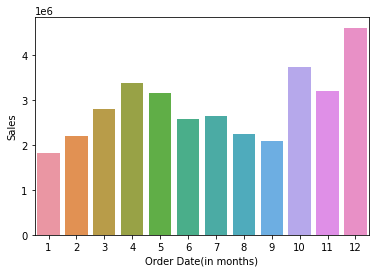

In [ ]:
sns.barplot( x =q1.index, y = q1['Sales'] )
plt.xlabel('Order Date(in months)')

### **Que2. What city sold the most product?**

In [ ]:
q2 = all_data.groupby(all_data['city']).count()
q2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
city,,,,,,,
Atlanta GA,14881,14881,14881,14881,14881,14881,14881
Austin TX,9905,9905,9905,9905,9905,9905,9905
Boston MA,19934,19934,19934,19934,19934,19934,19934
Dallas TX,14820,14820,14820,14820,14820,14820,14820
Los Angeles CA,29605,29605,29605,29605,29605,29605,29605
New York City NY,24876,24876,24876,24876,24876,24876,24876
Portland ME,2455,2455,2455,2455,2455,2455,2455
Portland OR,10010,10010,10010,10010,10010,10010,10010
San Francisco CA,44732,44732,44732,44732,44732,44732,44732


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

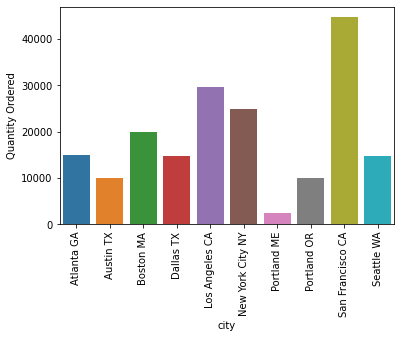

In [ ]:
sns.barplot( x =q2.index, y = q2['Quantity Ordered'] )
plt.xticks(rotation = 'vertical')

As we can see San Fancisco CA city sold the most product.

### **Que3. What time should we display advertisements to maximize the likelihood of customer’s buying product?**

In [ ]:
q3 = all_data.groupby(all_data['Order Date'].dt.hour).count()
q3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city
Order Date,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854


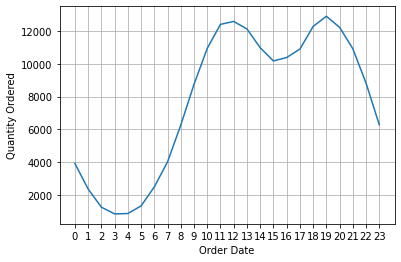

In [ ]:
sns.lineplot( x =q3.index, y = q3['Quantity Ordered'] )
plt.xticks(np.arange(min(q3.index), max(q3.index)+1, 1.0))
plt.grid()
plt.show()

The best time to display advertisements to maximize the likelihood of customer’s buying product is around 12 Noon and 7 pm evening.

### **Que4. What products are most often sold together?**

In [ ]:
q4 = all_data[all_data['Order ID'].duplicated(keep = False)]
q4

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,city
16,150518,Macbook Pro Laptop,1,1700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",1700.00,San Francisco CA
17,150518,iPhone,1,700.00,2019-02-26 12:38:00,"847 10th St, San Francisco, CA 94016",700.00,San Francisco CA
82,150582,iPhone,1,700.00,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",700.00,Seattle WA
83,150582,Lightning Charging Cable,1,14.95,2019-02-16 23:38:00,"678 Maple St, Seattle, WA 98101",14.95,Seattle WA
91,150590,Apple Airpods Headphones,1,150.00,2019-02-08 09:35:00,"196 River St, San Francisco, CA 94016",150.00,San Francisco CA
...,...,...,...,...,...,...,...,...
186756,278706,USB-C Charging Cable,1,11.95,2019-10-07 18:18:00,"942 11th St, San Francisco, CA 94016",11.95,San Francisco CA
186760,278710,USB-C Charging Cable,1,11.95,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",11.95,San Francisco CA
186761,278710,27in FHD Monitor,1,149.99,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",149.99,San Francisco CA
186769,278718,USB-C Charging Cable,1,11.95,2019-10-13 12:45:00,"479 Lincoln St, Atlanta, GA 30301",11.95,Atlanta GA


In [ ]:
q4['Grouped'] = q4.groupby('Order ID')['Product'].transform(lambda x : ', '.join(x))
q4 = q4[['Order ID','Grouped']].drop_duplicates()
q4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Grouped
16,150518,"Macbook Pro Laptop, iPhone"
82,150582,"iPhone, Lightning Charging Cable"
91,150590,"Apple Airpods Headphones, AAA Batteries (4-pack)"
119,150617,"Google Phone, USB-C Charging Cable"
154,150651,"Google Phone, USB-C Charging Cable"
...,...,...
186700,278653,"iPhone, Lightning Charging Cable"
186745,278697,"Wired Headphones, 27in 4K Gaming Monitor"
186755,278706,"Google Phone, USB-C Charging Cable"
186760,278710,"USB-C Charging Cable, 27in FHD Monitor"


In [ ]:
count = Counter()
for row in q4['Grouped']:
  lst = row.split(', ')
  count.update(Counter(combinations(lst,2)))

pd.DataFrame(count.most_common())


,0,1
0,"(iPhone, Lightning Charging Cable)",1005
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
...,...,...
308,"(LG Dryer, AAA Batteries (4-pack))",1
309,"(ThinkPad Laptop, 34in Ultrawide Monitor)",1
310,"(iPhone, LG Washing Machine)",1
311,"(AAA Batteries (4-pack), LG Dryer)",1


As we can see (iPhone + Lightning Charging Cable) product is most often sold together.

### **Que5. What product sold the most? Why do you think it sold the most?**

In [ ]:
q5 = all_data.groupby('Product').sum()
q5.head()

,Quantity Ordered,Price Each,Sales
Product,,,
20in Monitor,4129,451068.99,454148.71
27in 4K Gaming Monitor,6244,2429637.70,2435097.56
27in FHD Monitor,7550,1125974.93,1132424.50
34in Ultrawide Monitor,6199,2348718.19,2355558.01
AA Batteries (4-pack),27635,79015.68,106118.40


Text(0, 0.5, 'Price Each')

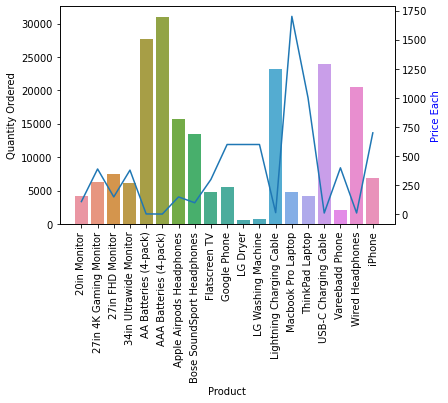

In [ ]:
fig, ax1 = plt.subplots(1,1)
ax2 = ax1.twinx()
sns.barplot( x =q5.index, y = q5['Quantity Ordered'], ax = ax1 )
sns.lineplot( x =q5.index, y = all_data.groupby('Product').mean()['Price Each'] , ax = ax2)
ax1.set_xticklabels(q5.index,rotation = 'vertical')
ax2.set_ylabel('Price Each', color = 'b')

AAA- Bateries are most sold product and the reason is they are cheap so the cheaper products are sold in higher quantity